In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing, SimpleExpSmoothing

In [40]:
#Load Base Dataser
demo = pd.read_csv('demographics.csv')
demo.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 5 - 17,Female 18 - 59,...,Male 0 - 4,Male 5 - 11,Male 12 - 17,Male 5 - 17,Male 18 - 59,Male 60,Male total,m_other,m_unknown,Total
0,2019,Afghanistan,AFG,Afghanistan,AFG,299424,311116,250049,NaN,550020,...,294347,333850,275895,NaN,554205,68273,1526570,NaN,NaN,3000483
1,2019,Iran (Islamic Rep. of),IRN,Afghanistan,AFG,0,0,0,NaN,14,...,0,0,0,NaN,17,5,22,NaN,NaN,36
2,2019,Pakistan,PAK,Afghanistan,AFG,7521,8360,4890,NaN,15951,...,6787,8589,4322,NaN,12191,1996,33885,NaN,NaN,72191
3,2019,Algeria,DZA,Albania,ALB,0,0,0,NaN,0,...,0,0,0,NaN,11,0,11,NaN,NaN,11
4,2019,Egypt,EGY,Albania,ALB,0,0,0,NaN,0,...,0,5,0,NaN,0,0,5,NaN,NaN,5


In [41]:
#Read in GDP Dataset
gdp = pd.read_csv('gdp_pc.csv')
gdp_2019 = gdp[['Country Name','Country Code', 'Indicator Name', '2019']]
gdp_2019.head()

,Country Name,Country Code,Indicator Name,2019
0,Aruba,ABW,GDP per capita (current US$),NaN
1,Afghanistan,AFG,GDP per capita (current US$),507.103432
2,Angola,AGO,GDP per capita (current US$),2790.726615
3,Albania,ALB,GDP per capita (current US$),5353.244856
4,Andorra,AND,GDP per capita (current US$),40886.391160


In [42]:
#Merge GDP with Base Dataset
demo = demo.rename(columns={'Country of origin (ISO)':'Country Code'})
new_demo = pd.merge(demo,gdp_2019,on='Country Code')
#Filter Columns (Losing Demographic Specific Data)
demo_gdp = new_demo[['Country Name', 'Country of origin', 'Country Code', 'Country of asylum',
                    'Country of asylum (ISO)','Female total','Male total', 
                     'Total','2019']]
demo_gdp = demo_gdp.rename(columns={'2019':'gdp_per_cap'})
demo_gdp.head()

,Country Name,Country of origin,Country Code,Country of asylum,Country of asylum (ISO),Female total,Male total,Total,gdp_per_cap
0,Afghanistan,Afghanistan,AFG,Afghanistan,AFG,1473913,1526570,3000483,507.103432
1,Afghanistan,Afghanistan,AFG,Egypt,EGY,13,13,26,507.103432
2,Afghanistan,Afghanistan,AFG,Argentina,ARG,5,7,12,507.103432
3,Afghanistan,Afghanistan,AFG,Armenia,ARM,0,5,5,507.103432
4,Afghanistan,Afghanistan,AFG,Australia,AUS,0,0,11585,507.103432


In [43]:
#Read in GDP Per Capita Growth Rate
growth = pd.read_csv('gdp_growth.csv')
growth_2019 = growth[['Country Name','Country Code', 'Indicator Name', '2019']]
growth_2019.head()

,Country Name,Country Code,Indicator Name,2019
0,Aruba,ABW,GDP per capita growth (annual %),NaN
1,Afghanistan,AFG,GDP per capita growth (annual %),1.536912
2,Angola,AGO,GDP per capita growth (annual %),-3.795674
3,Albania,ALB,GDP per capita growth (annual %),2.676550
4,Andorra,AND,GDP per capita growth (annual %),1.669680


In [44]:
#Merge GDP Per Capita Growth Rate with Base Dataset
demo_gdp = pd.merge(demo_gdp,growth_2019,on='Country Code')
demo_gdp = demo_gdp[['Country Name_x', 'Country of origin', 'Country Code', 'Country of asylum',
                    'Country of asylum (ISO)','Female total','Male total', 'Total',
                      'gdp_per_cap','2019']]
demo_gdp = demo_gdp.rename(columns={'Country Name_x':'country_name', '2019':'gdp_growth_rate'})
demo_gdp.head()

,country_name,Country of origin,Country Code,Country of asylum,Country of asylum (ISO),Female total,Male total,Total,gdp_per_cap,gdp_growth_rate
0,Afghanistan,Afghanistan,AFG,Afghanistan,AFG,1473913,1526570,3000483,507.103432,1.536912
1,Afghanistan,Afghanistan,AFG,Egypt,EGY,13,13,26,507.103432,1.536912
2,Afghanistan,Afghanistan,AFG,Argentina,ARG,5,7,12,507.103432,1.536912
3,Afghanistan,Afghanistan,AFG,Armenia,ARM,0,5,5,507.103432,1.536912
4,Afghanistan,Afghanistan,AFG,Australia,AUS,0,0,11585,507.103432,1.536912


In [45]:
#Read in Inflation Dataset
inflation = pd.read_csv('inflation.csv')
inflation_2019 = inflation[['Country Name','Country Code', 'Indicator Name', '2019']]
inflation_2019.head()

,Country Name,Country Code,Indicator Name,2019
0,Aruba,ABW,"Inflation, GDP deflator (annual %)",NaN
1,Afghanistan,AFG,"Inflation, GDP deflator (annual %)",6.521480
2,Angola,AGO,"Inflation, GDP deflator (annual %)",27.229035
3,Albania,ALB,"Inflation, GDP deflator (annual %)",0.363243
4,Andorra,AND,"Inflation, GDP deflator (annual %)",1.507863


In [46]:
#Merge Inflation with Base Dataset
demo_gdp = pd.merge(demo_gdp,inflation_2019,on='Country Code')
demo_gdp = demo_gdp[['Country Name', 'Country of origin', 'Country Code', 'Country of asylum',
                    'Country of asylum (ISO)','Female total','Male total', 'Total',
                      'gdp_per_cap', 'gdp_growth_rate', '2019']]
demo_gdp = demo_gdp.rename(columns={'Country Name_x':'country_name', '2019':'inflation_rate'})
demo_gdp.head()

,Country Name,Country of origin,Country Code,Country of asylum,Country of asylum (ISO),Female total,Male total,Total,gdp_per_cap,gdp_growth_rate,inflation_rate
0,Afghanistan,Afghanistan,AFG,Afghanistan,AFG,1473913,1526570,3000483,507.103432,1.536912,6.52148
1,Afghanistan,Afghanistan,AFG,Egypt,EGY,13,13,26,507.103432,1.536912,6.52148
2,Afghanistan,Afghanistan,AFG,Argentina,ARG,5,7,12,507.103432,1.536912,6.52148
3,Afghanistan,Afghanistan,AFG,Armenia,ARM,0,5,5,507.103432,1.536912,6.52148
4,Afghanistan,Afghanistan,AFG,Australia,AUS,0,0,11585,507.103432,1.536912,6.52148


In [47]:
#Read in Latitude/Longitude Dataset
lat_long = pd.read_csv('lat_long.csv')
lat_long = lat_long.rename(columns={'name': 'Country Name'})
lat_long

,country,latitude,longitude,Country Name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [48]:
#Merge Latitude/Longitude with Base Dataset
demo_gdp1 = pd.merge(demo_gdp,lat_long,on='Country Name')
demo_gdp1 = demo_gdp1.rename(columns={'country': '2_letter_code'})
demo_gdp1.head()

,Country Name,Country of origin,Country Code,Country of asylum,Country of asylum (ISO),Female total,Male total,Total,gdp_per_cap,gdp_growth_rate,inflation_rate,2_letter_code,latitude,longitude
0,Afghanistan,Afghanistan,AFG,Afghanistan,AFG,1473913,1526570,3000483,507.103432,1.536912,6.52148,AF,33.93911,67.709953
1,Afghanistan,Afghanistan,AFG,Egypt,EGY,13,13,26,507.103432,1.536912,6.52148,AF,33.93911,67.709953
2,Afghanistan,Afghanistan,AFG,Argentina,ARG,5,7,12,507.103432,1.536912,6.52148,AF,33.93911,67.709953
3,Afghanistan,Afghanistan,AFG,Armenia,ARM,0,5,5,507.103432,1.536912,6.52148,AF,33.93911,67.709953
4,Afghanistan,Afghanistan,AFG,Australia,AUS,0,0,11585,507.103432,1.536912,6.52148,AF,33.93911,67.709953


In [49]:
#Remove Redundant Column
filt1 = demo_gdp1.drop("Country Name",axis=1)
filt1.head()

,Country of origin,Country Code,Country of asylum,Country of asylum (ISO),Female total,Male total,Total,gdp_per_cap,gdp_growth_rate,inflation_rate,2_letter_code,latitude,longitude
0,Afghanistan,AFG,Afghanistan,AFG,1473913,1526570,3000483,507.103432,1.536912,6.52148,AF,33.93911,67.709953
1,Afghanistan,AFG,Egypt,EGY,13,13,26,507.103432,1.536912,6.52148,AF,33.93911,67.709953
2,Afghanistan,AFG,Argentina,ARG,5,7,12,507.103432,1.536912,6.52148,AF,33.93911,67.709953
3,Afghanistan,AFG,Armenia,ARM,0,5,5,507.103432,1.536912,6.52148,AF,33.93911,67.709953
4,Afghanistan,AFG,Australia,AUS,0,0,11585,507.103432,1.536912,6.52148,AF,33.93911,67.709953


In [50]:
#Select Columns for GroupBy Totals
ref = filt1[['Country of origin','Country Code','Country of asylum', 'Country of asylum (ISO)', 'Female total', 'Male total','Total']]
ref.head()

,Country of origin,Country Code,Country of asylum,Country of asylum (ISO),Female total,Male total,Total
0,Afghanistan,AFG,Afghanistan,AFG,1473913,1526570,3000483
1,Afghanistan,AFG,Egypt,EGY,13,13,26
2,Afghanistan,AFG,Argentina,ARG,5,7,12
3,Afghanistan,AFG,Armenia,ARM,0,5,5
4,Afghanistan,AFG,Australia,AUS,0,0,11585


In [51]:
#Groupby Totals
grouped_ref = ref.groupby("Country of origin").sum()
grouped_ref = grouped_ref.reset_index()
grouped_ref = grouped_ref.rename(columns={"Country of origin":"origin_country","Female total":
                           "female_total","Male total":"male_total","Total":"total"})
grouped_ref.head()

,origin_country,female_total,male_total,total
0,Afghanistan,2203060,2412457,5731617
1,Albania,3869,3476,15027
2,Algeria,1298,1640,4619
3,Angola,12150,11963,26414
4,Antigua and Barbuda,0,0,117


In [52]:
#Reset for GroupBy Merge
gdp_2019 = gdp_2019.rename(columns={"Country Name":"origin_country"})
growth_2019 = growth_2019.rename(columns={"Country Name":"origin_country"})
inflation_2019 = inflation_2019.rename(columns={"Country Name":"origin_country"})
lat_long = lat_long.rename(columns={"Country Name":"origin_country"})                           
# grouped_1 = pd.merge(grouped_ref,gdp2019,on='Country Code')

In [53]:
#Merge All - GroupBy
grouped_0 = pd.merge(grouped_ref,lat_long,on='origin_country')
grouped_0 = grouped_0.rename(columns={'country':'2_letter_code'})

grouped_1 = pd.merge(grouped_0,gdp_2019,on='origin_country')
grouped_1 = grouped_1.rename(columns={'2019':'gdp_per_cap','Country Code':'3_letter_code'})
grouped_1 = grouped_1[['origin_country','2_letter_code','3_letter_code','female_total',
                       'male_total','total', 'latitude','longitude',
                      'gdp_per_cap']]


grouped_2 = pd.merge(grouped_1,growth_2019,on='origin_country')
grouped_2 = grouped_2.drop("Country Code",axis=1)
grouped_2 = grouped_2.drop("Indicator Name",axis=1)
grouped_2 = grouped_2.rename(columns={'2019':'gdp_per_cap_growth_rate'})


grouped_3 = pd.merge(grouped_2,inflation_2019,on='origin_country')
grouped_3 = grouped_3.drop("Country Code",axis=1)
grouped_3 = grouped_3.drop("Indicator Name",axis=1)
grouped_3 = grouped_3.rename(columns={'2019':'inflation_rate'})

combined_refugees = grouped_3


# grouped_4 = pd.merge(grouped_3,lat_long,on='origin_country')

In [54]:
#Combined Dataset - Without Asylum Specific Breakdowns and Demographic Breakdown
combined_refugees.head()

,origin_country,2_letter_code,3_letter_code,female_total,male_total,total,latitude,longitude,gdp_per_cap,gdp_per_cap_growth_rate,inflation_rate
0,Afghanistan,AF,AFG,2203060,2412457,5731617,33.939110,67.709953,507.103432,1.536912,6.521480
1,Albania,AL,ALB,3869,3476,15027,41.153332,20.168331,5353.244856,2.676550,0.363243
2,Algeria,DZ,DZA,1298,1640,4619,28.033886,1.659626,3973.964072,-1.130692,-0.910066
3,Angola,AO,AGO,12150,11963,26414,-11.202692,17.873887,2790.726615,-3.795674,27.229035
4,Antigua and Barbuda,AG,ATG,0,0,117,17.060816,-61.796428,17112.821130,3.762049,-1.081851


In [55]:
#Combined Dataset - With Asylum Specific Breakdowns and without Demographic Breakdown
paired_refugees = filt1
paired_refugees.head()

,Country of origin,Country Code,Country of asylum,Country of asylum (ISO),Female total,Male total,Total,gdp_per_cap,gdp_growth_rate,inflation_rate,2_letter_code,latitude,longitude
0,Afghanistan,AFG,Afghanistan,AFG,1473913,1526570,3000483,507.103432,1.536912,6.52148,AF,33.93911,67.709953
1,Afghanistan,AFG,Egypt,EGY,13,13,26,507.103432,1.536912,6.52148,AF,33.93911,67.709953
2,Afghanistan,AFG,Argentina,ARG,5,7,12,507.103432,1.536912,6.52148,AF,33.93911,67.709953
3,Afghanistan,AFG,Armenia,ARM,0,5,5,507.103432,1.536912,6.52148,AF,33.93911,67.709953
4,Afghanistan,AFG,Australia,AUS,0,0,11585,507.103432,1.536912,6.52148,AF,33.93911,67.709953


In [56]:
#Read In Population Dataset
pop = pd.read_csv("pop.csv")
pop2019 = pop[['Country Name','Country Code','2019']]
pop2019 = pop2019.rename(columns = {'Country Name':'origin_country', 'Country Code':'3_letter_code',
                                   '2019':'total_population'})
pop2019.head()

,origin_country,3_letter_code,total_population
0,Aruba,ABW,106314.0
1,Afghanistan,AFG,38041754.0
2,Angola,AGO,31825295.0
3,Albania,ALB,2854191.0
4,Andorra,AND,77142.0


In [57]:
scaled_ref = pd.merge(combined_refugees,pop2019, on = "3_letter_code")
scaled_ref = scaled_ref.drop("origin_country_y",axis=1)
scaled_ref = scaled_ref.rename(columns = {'origin_country_x':'origin_country'})
scaled_ref.head()

,origin_country,2_letter_code,3_letter_code,female_total,male_total,total,latitude,longitude,gdp_per_cap,gdp_per_cap_growth_rate,inflation_rate,total_population
0,Afghanistan,AF,AFG,2203060,2412457,5731617,33.939110,67.709953,507.103432,1.536912,6.521480,38041754.0
1,Albania,AL,ALB,3869,3476,15027,41.153332,20.168331,5353.244856,2.676550,0.363243,2854191.0
2,Algeria,DZ,DZA,1298,1640,4619,28.033886,1.659626,3973.964072,-1.130692,-0.910066,43053054.0
3,Angola,AO,AGO,12150,11963,26414,-11.202692,17.873887,2790.726615,-3.795674,27.229035,31825295.0
4,Antigua and Barbuda,AG,ATG,0,0,117,17.060816,-61.796428,17112.821130,3.762049,-1.081851,97118.0


In [58]:
scaled_ref['female_ref_to_total_pop_ratio'] = scaled_ref['female_total']/scaled_ref['total_population']
scaled_ref['male_ref_to_total_pop_ratio'] = scaled_ref['male_total']/scaled_ref['total_population']
scaled_ref['total_ref_to_total_pop_ratio'] = scaled_ref['female_total']/scaled_ref['total_population']

In [59]:
scaled_ref

,origin_country,2_letter_code,3_letter_code,female_total,male_total,total,latitude,longitude,gdp_per_cap,gdp_per_cap_growth_rate,inflation_rate,total_population,female_ref_to_total_pop_ratio,male_ref_to_total_pop_ratio,total_ref_to_total_pop_ratio
0,Afghanistan,AF,AFG,2203060,2412457,5731617,33.939110,67.709953,507.103432,1.536912,6.521480,38041754.0,5.791163e-02,0.063416,5.791163e-02
1,Albania,AL,ALB,3869,3476,15027,41.153332,20.168331,5353.244856,2.676550,0.363243,2854191.0,1.355550e-03,0.001218,1.355550e-03
2,Algeria,DZ,DZA,1298,1640,4619,28.033886,1.659626,3973.964072,-1.130692,-0.910066,43053054.0,3.014885e-05,0.000038,3.014885e-05
3,Angola,AO,AGO,12150,11963,26414,-11.202692,17.873887,2790.726615,-3.795674,27.229035,31825295.0,3.817718e-04,0.000376,3.817718e-04
4,Antigua and Barbuda,AG,ATG,0,0,117,17.060816,-61.796428,17112.821130,3.762049,-1.081851,97118.0,0.000000e+00,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,United Arab Emirates,AE,ARE,22,17,155,23.424076,53.847818,43103.323060,0.225275,-1.899928,9770529.0,2.251669e-06,0.000002,2.251669e-06
142,Uruguay,UY,URY,0,0,15,-32.522779,-55.765835,16190.126960,-0.137889,7.667916,3461734.0,0.000000e+00,0.000000,0.000000e+00
143,Uzbekistan,UZ,UZB,204,233,3219,41.377491,64.585262,1724.841134,3.600396,19.233621,33580650.0,6.074927e-06,0.000007,6.074927e-06
144,Zambia,ZM,ZMB,11,0,264,-13.133897,27.849332,1305.063254,-1.450264,7.632867,17861030.0,6.158659e-07,0.000000,6.158659e-07


In [60]:
#Export Data
# combined_refugees.to_csv("combined_refugees.csv")
# paired_refugees.to_csv("paired_refugees.csv")

In [61]:
#Make Table for Countries of Asylum

In [62]:
#Asylum Totals
grouped_asy = ref.groupby("Country of asylum").sum()
grouped_asy = grouped_asy.reset_index()
grouped_asy = grouped_asy.rename(columns={"Country of asylum":"asylum_country","Female total":
                           "female_total","Male total":"male_total","Total":"total"})
grouped_asy.head()

,asylum_country,female_total,male_total,total
0,Afghanistan,1512219,1560455,3072674
1,Albania,38,166,204
2,Algeria,105,185,290
3,Angola,0,0,2432
4,Argentina,961,1338,2299


In [63]:
#Reset for GroupBy Merge
a_gdp_2019 = gdp_2019.rename(columns={"origin_country":"asylum_country"})
a_growth_2019 = growth_2019.rename(columns={"origin_country":"asylum_country"})
a_inflation_2019 = inflation_2019.rename(columns={"origin_country":"asylum_country"})
a_lat_long = lat_long.rename(columns={"origin_country":"asylum_country"})                           
# grouped_1 = pd.merge(grouped_ref,gdp2019,on='Country Code')

In [64]:
#Merge All - GroupBy
asylum_0 = pd.merge(grouped_asy,a_lat_long,on='asylum_country')
asylum_0 = asylum_0.rename(columns={'country':'2_letter_code'})

asylum_1 = pd.merge(asylum_0,a_gdp_2019,on='asylum_country')
asylum_1 = asylum_1.rename(columns={'2019':'gdp_per_cap','Country Code':'3_letter_code'})
asylum_1 = asylum_1[['asylum_country','2_letter_code','3_letter_code','female_total',
                       'male_total','total', 'latitude','longitude',
                      'gdp_per_cap']]


asylum_2 = pd.merge(asylum_1,a_growth_2019,on='asylum_country')
asylum_2 = asylum_2.drop("Country Code",axis=1)
asylum_2 = asylum_2.drop("Indicator Name",axis=1)
asylum_2 = asylum_2.rename(columns={'2019':'gdp_per_cap_growth_rate'})


asylum_3 = pd.merge(asylum_2,a_inflation_2019,on='asylum_country')
asylum_3 = asylum_3.drop("Country Code",axis=1)
asylum_3 = asylum_3.drop("Indicator Name",axis=1)
asylum_3 = asylum_3.rename(columns={'2019':'inflation_rate'})

combined_asylum = asylum_3


In [65]:
combined_asylum.head()

,asylum_country,2_letter_code,3_letter_code,female_total,male_total,total,latitude,longitude,gdp_per_cap,gdp_per_cap_growth_rate,inflation_rate
0,Afghanistan,AF,AFG,1512219,1560455,3072674,33.939110,67.709953,507.103432,1.536912,6.521480
1,Albania,AL,ALB,38,166,204,41.153332,20.168331,5353.244856,2.676550,0.363243
2,Algeria,DZ,DZA,105,185,290,28.033886,1.659626,3973.964072,-1.130692,-0.910066
3,Angola,AO,AGO,0,0,2432,-11.202692,17.873887,2790.726615,-3.795674,27.229035
4,Argentina,AR,ARG,961,1338,2299,-38.416097,-63.616672,9912.281809,-3.055855,50.622568


In [66]:
scaled_asylum = pd.merge(combined_asylum,pop2019, on = "3_letter_code")
scaled_asylum = scaled_asylum.drop("origin_country",axis=1)
scaled_asylum.head()

,asylum_country,2_letter_code,3_letter_code,female_total,male_total,total,latitude,longitude,gdp_per_cap,gdp_per_cap_growth_rate,inflation_rate,total_population
0,Afghanistan,AF,AFG,1512219,1560455,3072674,33.939110,67.709953,507.103432,1.536912,6.521480,38041754.0
1,Albania,AL,ALB,38,166,204,41.153332,20.168331,5353.244856,2.676550,0.363243,2854191.0
2,Algeria,DZ,DZA,105,185,290,28.033886,1.659626,3973.964072,-1.130692,-0.910066,43053054.0
3,Angola,AO,AGO,0,0,2432,-11.202692,17.873887,2790.726615,-3.795674,27.229035,31825295.0
4,Argentina,AR,ARG,961,1338,2299,-38.416097,-63.616672,9912.281809,-3.055855,50.622568,44938712.0


In [67]:
scaled_asylum['female_ref_to_total_pop_ratio'] = scaled_asylum['female_total']/scaled_asylum['total_population']
scaled_asylum['male_ref_to_total_pop_ratio'] = scaled_asylum['male_total']/scaled_asylum['total_population']
scaled_asylum['total_ref_to_total_pop_ratio'] = scaled_asylum['female_total']/scaled_asylum['total_population']

In [68]:
scaled_asylum

,asylum_country,2_letter_code,3_letter_code,female_total,male_total,total,latitude,longitude,gdp_per_cap,gdp_per_cap_growth_rate,inflation_rate,total_population,female_ref_to_total_pop_ratio,male_ref_to_total_pop_ratio,total_ref_to_total_pop_ratio
0,Afghanistan,AF,AFG,1512219,1560455,3072674,33.939110,67.709953,507.103432,1.536912,6.521480,38041754.0,3.975156e-02,4.101953e-02,3.975156e-02
1,Albania,AL,ALB,38,166,204,41.153332,20.168331,5353.244856,2.676550,0.363243,2854191.0,1.331376e-05,5.816009e-05,1.331376e-05
2,Algeria,DZ,DZA,105,185,290,28.033886,1.659626,3973.964072,-1.130692,-0.910066,43053054.0,2.438851e-06,4.297024e-06,2.438851e-06
3,Angola,AO,AGO,0,0,2432,-11.202692,17.873887,2790.726615,-3.795674,27.229035,31825295.0,0.000000e+00,0.000000e+00,0.000000e+00
4,Argentina,AR,ARG,961,1338,2299,-38.416097,-63.616672,9912.281809,-3.055855,50.622568,44938712.0,2.138468e-05,2.977388e-05,2.138468e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,United Arab Emirates,AE,ARE,495,462,957,23.424076,53.847818,43103.323060,0.225275,-1.899928,9770529.0,5.066256e-05,4.728505e-05,5.066256e-05
129,Uruguay,UY,URY,147,199,346,-32.522779,-55.765835,16190.126960,-0.137889,7.667916,3461734.0,4.246427e-05,5.748564e-05,4.246427e-05
130,Uzbekistan,UZ,UZB,6,7,13,41.377491,64.585262,1724.841134,3.600396,19.233621,33580650.0,1.786743e-07,2.084534e-07,1.786743e-07
131,Zambia,ZM,ZMB,15355,17759,33114,-13.133897,27.849332,1305.063254,-1.450264,7.632867,17861030.0,8.596929e-04,9.942876e-04,8.596929e-04


In [69]:
#Export Data
#scaled_asylum.to_csv('scaled_asylum.csv')

In [70]:
scaled_ref.head()

,origin_country,2_letter_code,3_letter_code,female_total,male_total,total,latitude,longitude,gdp_per_cap,gdp_per_cap_growth_rate,inflation_rate,total_population,female_ref_to_total_pop_ratio,male_ref_to_total_pop_ratio,total_ref_to_total_pop_ratio
0,Afghanistan,AF,AFG,2203060,2412457,5731617,33.939110,67.709953,507.103432,1.536912,6.521480,38041754.0,0.057912,0.063416,0.057912
1,Albania,AL,ALB,3869,3476,15027,41.153332,20.168331,5353.244856,2.676550,0.363243,2854191.0,0.001356,0.001218,0.001356
2,Algeria,DZ,DZA,1298,1640,4619,28.033886,1.659626,3973.964072,-1.130692,-0.910066,43053054.0,0.000030,0.000038,0.000030
3,Angola,AO,AGO,12150,11963,26414,-11.202692,17.873887,2790.726615,-3.795674,27.229035,31825295.0,0.000382,0.000376,0.000382
4,Antigua and Barbuda,AG,ATG,0,0,117,17.060816,-61.796428,17112.821130,3.762049,-1.081851,97118.0,0.000000,0.000000,0.000000


In [71]:
scaled_asylum.head()

,asylum_country,2_letter_code,3_letter_code,female_total,male_total,total,latitude,longitude,gdp_per_cap,gdp_per_cap_growth_rate,inflation_rate,total_population,female_ref_to_total_pop_ratio,male_ref_to_total_pop_ratio,total_ref_to_total_pop_ratio
0,Afghanistan,AF,AFG,1512219,1560455,3072674,33.939110,67.709953,507.103432,1.536912,6.521480,38041754.0,0.039752,0.041020,0.039752
1,Albania,AL,ALB,38,166,204,41.153332,20.168331,5353.244856,2.676550,0.363243,2854191.0,0.000013,0.000058,0.000013
2,Algeria,DZ,DZA,105,185,290,28.033886,1.659626,3973.964072,-1.130692,-0.910066,43053054.0,0.000002,0.000004,0.000002
3,Angola,AO,AGO,0,0,2432,-11.202692,17.873887,2790.726615,-3.795674,27.229035,31825295.0,0.000000,0.000000,0.000000
4,Argentina,AR,ARG,961,1338,2299,-38.416097,-63.616672,9912.281809,-3.055855,50.622568,44938712.0,0.000021,0.000030,0.000021


In [72]:
#len(scaled_ref)

In [73]:
#len(scaled_asylum)

In [74]:
aggregate = scaled_ref[['origin_country','2_letter_code','3_letter_code','female_total','male_total','total']]

In [75]:
aggregate.head()

,origin_country,2_letter_code,3_letter_code,female_total,male_total,total
0,Afghanistan,AF,AFG,2203060,2412457,5731617
1,Albania,AL,ALB,3869,3476,15027
2,Algeria,DZ,DZA,1298,1640,4619
3,Angola,AO,AGO,12150,11963,26414
4,Antigua and Barbuda,AG,ATG,0,0,117


In [76]:
aggregate = aggregate.rename(columns={'origin_country':'asylum_country',
                         'female_total':'female_total_out',
                         'male_total':'male_total_out',
                         'total':'total_out'})

In [77]:
aggregate = pd.merge(aggregate,scaled_asylum,on='asylum_country')

In [78]:
aggregate = aggregate.drop('2_letter_code_y',axis=1)
aggregate = aggregate.drop('3_letter_code_y',axis=1)

In [79]:
aggregate = aggregate.rename(columns={
    '2_letter_code_x':'2_letter_code',
    '3_letter_code_x':'3_letter_code',
    'female_total':'female_total_in',
    'male_total':'male_total_in',
    'total':'total_in' 
})

In [80]:
aggregate['female_out_in_ratio'] = aggregate['female_total_out']/aggregate['female_total_in']
aggregate['male_out_in_ratio'] = aggregate['male_total_out']/aggregate['male_total_in']
aggregate['total_out_in_ratio'] = aggregate['total_out']/aggregate['total_in']

In [81]:
#Export Aggregate
# aggregate.to_csv('aggregate.csv')

In [82]:
aggregate

,asylum_country,2_letter_code,3_letter_code,female_total_out,male_total_out,total_out,female_total_in,male_total_in,total_in,latitude,...,gdp_per_cap,gdp_per_cap_growth_rate,inflation_rate,total_population,female_ref_to_total_pop_ratio,male_ref_to_total_pop_ratio,total_ref_to_total_pop_ratio,female_out_in_ratio,male_out_in_ratio,total_out_in_ratio
0,Afghanistan,AF,AFG,2203060,2412457,5731617,1512219,1560455,3072674,33.939110,...,507.103432,1.536912,6.521480,38041754.0,3.975156e-02,4.101953e-02,3.975156e-02,1.456839,1.545996,1.865351
1,Albania,AL,ALB,3869,3476,15027,38,166,204,41.153332,...,5353.244856,2.676550,0.363243,2854191.0,1.331376e-05,5.816009e-05,1.331376e-05,101.815789,20.939759,73.661765
2,Algeria,DZ,DZA,1298,1640,4619,105,185,290,28.033886,...,3973.964072,-1.130692,-0.910066,43053054.0,2.438851e-06,4.297024e-06,2.438851e-06,12.361905,8.864865,15.927586
3,Angola,AO,AGO,12150,11963,26414,0,0,2432,-11.202692,...,2790.726615,-3.795674,27.229035,31825295.0,0.000000e+00,0.000000e+00,0.000000e+00,inf,inf,10.861020
4,Argentina,AR,ARG,13,7,104,961,1338,2299,-38.416097,...,9912.281809,-3.055855,50.622568,44938712.0,2.138468e-05,2.977388e-05,2.138468e-05,0.013528,0.005232,0.045237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,United Arab Emirates,AE,ARE,22,17,155,495,462,957,23.424076,...,43103.323060,0.225275,-1.899928,9770529.0,5.066256e-05,4.728505e-05,5.066256e-05,0.044444,0.036797,0.161964
124,Uruguay,UY,URY,0,0,15,147,199,346,-32.522779,...,16190.126960,-0.137889,7.667916,3461734.0,4.246427e-05,5.748564e-05,4.246427e-05,0.000000,0.000000,0.043353
125,Uzbekistan,UZ,UZB,204,233,3219,6,7,13,41.377491,...,1724.841134,3.600396,19.233621,33580650.0,1.786743e-07,2.084534e-07,1.786743e-07,34.000000,33.285714,247.615385
126,Zambia,ZM,ZMB,11,0,264,15355,17759,33114,-13.133897,...,1305.063254,-1.450264,7.632867,17861030.0,8.596929e-04,9.942876e-04,8.596929e-04,0.000716,0.000000,0.007972


In [83]:
#Linear Reg.

In [84]:
aggregate.columns

Index(['asylum_country', '2_letter_code', '3_letter_code', 'female_total_out',
       'male_total_out', 'total_out', 'female_total_in', 'male_total_in',
       'total_in', 'latitude', 'longitude', 'gdp_per_cap',
       'gdp_per_cap_growth_rate', 'inflation_rate', 'total_population',
       'female_ref_to_total_pop_ratio', 'male_ref_to_total_pop_ratio',
       'total_ref_to_total_pop_ratio', 'female_out_in_ratio',
       'male_out_in_ratio', 'total_out_in_ratio'],
      dtype='object')

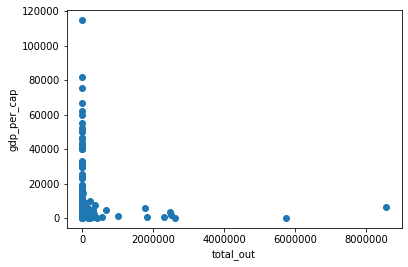

In [85]:
#GDP per Capita
plt.scatter(aggregate['total_out'],aggregate['gdp_per_cap'])
plt.xlabel('total_out')
plt.ylabel('gdp_per_cap')
plt.show()

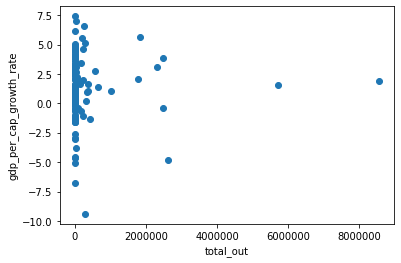

In [86]:
#GDP per Capita Growth Rate
plt.scatter(aggregate['total_out'],aggregate['gdp_per_cap_growth_rate'])
plt.xlabel('total_out')
plt.ylabel('gdp_per_cap_growth_rate')
plt.show()

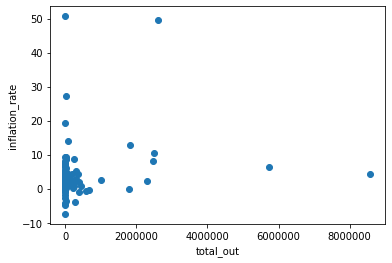

In [87]:
#Inflation Rate
plt.scatter(aggregate['total_out'],aggregate['inflation_rate'])
plt.xlabel('total_out')
plt.ylabel('inflation_rate')
plt.show()

In [88]:
# aggregate

In [89]:
shaved_aggregate = aggregate.dropna()
shaved_aggregate

,asylum_country,2_letter_code,3_letter_code,female_total_out,male_total_out,total_out,female_total_in,male_total_in,total_in,latitude,...,gdp_per_cap,gdp_per_cap_growth_rate,inflation_rate,total_population,female_ref_to_total_pop_ratio,male_ref_to_total_pop_ratio,total_ref_to_total_pop_ratio,female_out_in_ratio,male_out_in_ratio,total_out_in_ratio
0,Afghanistan,AF,AFG,2203060,2412457,5731617,1512219,1560455,3072674,33.939110,...,507.103432,1.536912,6.521480,38041754.0,3.975156e-02,4.101953e-02,3.975156e-02,1.456839,1.545996,1.865351
1,Albania,AL,ALB,3869,3476,15027,38,166,204,41.153332,...,5353.244856,2.676550,0.363243,2854191.0,1.331376e-05,5.816009e-05,1.331376e-05,101.815789,20.939759,73.661765
2,Algeria,DZ,DZA,1298,1640,4619,105,185,290,28.033886,...,3973.964072,-1.130692,-0.910066,43053054.0,2.438851e-06,4.297024e-06,2.438851e-06,12.361905,8.864865,15.927586
3,Angola,AO,AGO,12150,11963,26414,0,0,2432,-11.202692,...,2790.726615,-3.795674,27.229035,31825295.0,0.000000e+00,0.000000e+00,0.000000e+00,inf,inf,10.861020
4,Argentina,AR,ARG,13,7,104,961,1338,2299,-38.416097,...,9912.281809,-3.055855,50.622568,44938712.0,2.138468e-05,2.977388e-05,2.138468e-05,0.013528,0.005232,0.045237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,United Arab Emirates,AE,ARE,22,17,155,495,462,957,23.424076,...,43103.323060,0.225275,-1.899928,9770529.0,5.066256e-05,4.728505e-05,5.066256e-05,0.044444,0.036797,0.161964
124,Uruguay,UY,URY,0,0,15,147,199,346,-32.522779,...,16190.126960,-0.137889,7.667916,3461734.0,4.246427e-05,5.748564e-05,4.246427e-05,0.000000,0.000000,0.043353
125,Uzbekistan,UZ,UZB,204,233,3219,6,7,13,41.377491,...,1724.841134,3.600396,19.233621,33580650.0,1.786743e-07,2.084534e-07,1.786743e-07,34.000000,33.285714,247.615385
126,Zambia,ZM,ZMB,11,0,264,15355,17759,33114,-13.133897,...,1305.063254,-1.450264,7.632867,17861030.0,8.596929e-04,9.942876e-04,8.596929e-04,0.000716,0.000000,0.007972


In [90]:
transposed_aggregate = shaved_aggregate.transpose()

In [91]:
transposed_aggregate

,0,1,2,3,4,5,6,8,9,10,...,115,117,118,121,122,123,124,125,126,127
asylum_country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Azerbaijan,Bahrain,Bangladesh,...,Togo,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,Uruguay,Uzbekistan,Zambia,Zimbabwe
2_letter_code,AF,AL,DZ,AO,AR,AM,AU,AZ,BH,BD,...,TG,TN,TR,UG,UA,AE,UY,UZ,ZM,ZW
3_letter_code,AFG,ALB,DZA,AGO,ARG,ARM,AUS,AZE,BHR,BGD,...,TGO,TUN,TUR,UGA,UKR,ARE,URY,UZB,ZMB,ZWE
female_total_out,2203060,3869,1298,12150,13,3596,5,4209,47,1159,...,2288,257,23573,622,1353982,22,0,204,11,817
male_total_out,2412457,3476,1640,11963,7,3602,5,3968,79,6120,...,3228,398,33267,905,1063763,17,0,233,0,719
total_out,5731617,15027,4619,26414,104,10967,20,663950,555,23263,...,8027,2075,83286,2311813,2474096,155,15,3219,264,280165
female_total_in,1512219,38,105,0,961,1372,0,240,113,0,...,5897,55,0,49543,1352222,495,147,6,15355,843
male_total_in,1560455,166,185,0,1338,1197,0,418,129,10,...,4377,244,0,54353,1063163,462,199,7,17759,905
total_in,3072674,204,290,2432,2299,3142,37573,652984,242,10,...,10274,299,2471,2408402,2415385,957,346,13,33114,271748
latitude,33.9391,41.1533,28.0339,-11.2027,-38.4161,40.0691,-25.2744,40.1431,25.9304,23.685,...,8.61954,33.8869,38.9637,1.37333,48.3794,23.4241,-32.5228,41.3775,-13.1339,-19.0154


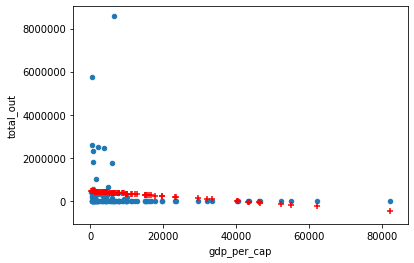

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              total_out   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.505
Date:                Sat, 22 May 2021   Prob (F-statistic):              0.117
Time:                        19:30:59   Log-Likelihood:                -1594.2
No. Observations:                 104   AIC:                             3192.
Df Residuals:                     102   BIC:                             3198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         4.58e+05   1.34e+05      3.418      0.001    1.92e+05    7.24e+05
gdp_per_cap   -11.2978      7.138     -1.583      0.117     -25.456       2.861
==============================================================================
Omnibus:                      149.319   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4964.464
Skew:                           5.292   Prob(JB):                         0.00
Kurtosis:                      35.150   Cond. No.                     2.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
#Fit Model = GDP
X = sm.add_constant(shaved_aggregate['gdp_per_cap'])
#lin_model = sm.OLS(aggregate[['gdp_per_cap','gdp_per_cap_growth_rate','inflation_rate']],X).fit()
gdp_model = sm.OLS(shaved_aggregate['total_out'],X).fit()
yhat = gdp_model.predict(X)
shaved_aggregate.plot.scatter(x='gdp_per_cap',y='total_out')
plt.scatter(x=shaved_aggregate['gdp_per_cap'],y=yhat,color='r',marker='+')
plt.show()
gdp_model.summary()

In [93]:
shaved_aggregate.columns

Index(['asylum_country', '2_letter_code', '3_letter_code', 'female_total_out',
       'male_total_out', 'total_out', 'female_total_in', 'male_total_in',
       'total_in', 'latitude', 'longitude', 'gdp_per_cap',
       'gdp_per_cap_growth_rate', 'inflation_rate', 'total_population',
       'female_ref_to_total_pop_ratio', 'male_ref_to_total_pop_ratio',
       'total_ref_to_total_pop_ratio', 'female_out_in_ratio',
       'male_out_in_ratio', 'total_out_in_ratio'],
      dtype='object')

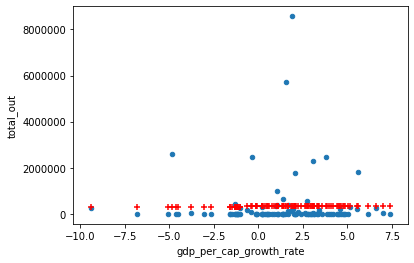

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              total_out   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.01089
Date:                Sat, 22 May 2021   Prob (F-statistic):              0.917
Time:                        19:31:00   Log-Likelihood:                -1595.5
No. Observations:                 104   AIC:                             3195.
Df Residuals:                     102   BIC:                             3200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.289e+05   1.22e+05      2.701      0.008    8.74e+04     5.7e+05
gdp_per_cap_growth_rate  3967.5131    3.8e+04      0.104      0.917   -7.14e+04    7.94e+04
==============================================================================
Omnibus:                      149.142   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4849.284
Skew:                           5.296   Prob(JB):                         0.00
Kurtosis:                      34.731   Cond. No.                         3.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#Fit Model - GDP Growth
X = sm.add_constant(shaved_aggregate['gdp_per_cap_growth_rate'])
#lin_model = sm.OLS(aggregate[['gdp_per_cap','gdp_per_cap_growth_rate','inflation_rate']],X).fit()
gdp_growth_model = sm.OLS(shaved_aggregate['total_out'],X).fit()
yhat = gdp_growth_model.predict(X)
shaved_aggregate.plot.scatter(x='gdp_per_cap_growth_rate',y='total_out')
plt.scatter(x=shaved_aggregate['gdp_per_cap_growth_rate'],y=yhat,color='r',marker='+')
plt.show()
gdp_growth_model.summary()

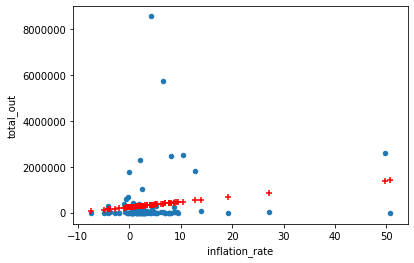

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              total_out   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.793
Date:                Sat, 22 May 2021   Prob (F-statistic):             0.0978
Time:                        19:31:00   Log-Likelihood:                -1594.1
No. Observations:                 104   AIC:                             3192.
Df Residuals:                     102   BIC:                             3197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.385e+05   1.23e+05      1.942      0.055   -5146.974    4.82e+05
inflation_rate  2.311e+04   1.38e+04      1.671      0.098   -4318.970    5.05e+04
==============================================================================
Omnibus:                      150.878   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5278.879
Skew:                           5.358   Prob(JB):                         0.00
Kurtosis:                      36.217   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
#Fit Model
X = sm.add_constant(shaved_aggregate['inflation_rate'])
#lin_model = sm.OLS(aggregate[['gdp_per_cap','gdp_per_cap_growth_rate','inflation_rate']],X).fit()
inflation_model = sm.OLS(shaved_aggregate['total_out'],X).fit()
yhat = inflation_model.predict(X)
shaved_aggregate.plot.scatter(x='inflation_rate',y='total_out')
plt.scatter(x=shaved_aggregate['inflation_rate'],y=yhat,color='r',marker='+')
plt.show()
inflation_model.summary()

In [96]:
shaved_aggregate.columns

Index(['asylum_country', '2_letter_code', '3_letter_code', 'female_total_out',
       'male_total_out', 'total_out', 'female_total_in', 'male_total_in',
       'total_in', 'latitude', 'longitude', 'gdp_per_cap',
       'gdp_per_cap_growth_rate', 'inflation_rate', 'total_population',
       'female_ref_to_total_pop_ratio', 'male_ref_to_total_pop_ratio',
       'total_ref_to_total_pop_ratio', 'female_out_in_ratio',
       'male_out_in_ratio', 'total_out_in_ratio'],
      dtype='object')

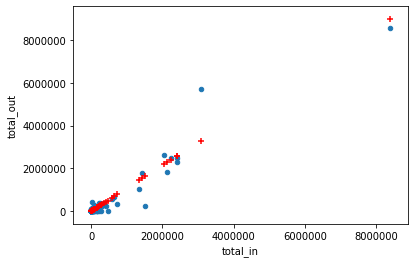

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              total_out   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1235.
Date:                Sat, 22 May 2021   Prob (F-statistic):           8.46e-59
Time:                        19:31:00   Log-Likelihood:                -1461.7
No. Observations:                 104   AIC:                             2927.
Df Residuals:                     102   BIC:                             2933.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.876e+04    3.2e+04     -0.586      0.559   -8.23e+04    4.48e+04
total_in       1.0766      0.031     35.136      0.000       1.016       1.137
==============================================================================
Omnibus:                      129.914   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7034.181
Skew:                           3.846   Prob(JB):                         0.00
Kurtosis:                      42.549   Cond. No.                     1.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
#Fit Model
X = sm.add_constant(shaved_aggregate['total_in'])
#lin_model = sm.OLS(aggregate[['gdp_per_cap','gdp_per_cap_growth_rate','inflation_rate']],X).fit()
host_model = sm.OLS(shaved_aggregate['total_out'],X).fit()
yhat = host_model.predict(X)
shaved_aggregate.plot.scatter(x='total_in',y='total_out')
plt.scatter(x=shaved_aggregate['total_in'],y=yhat,color='r',marker='+')
plt.show()
host_model.summary()

In [98]:
df = pd.read_csv("aggregate.csv")
df.head()

,Unnamed: 0,asylum_country,2_letter_code,3_letter_code,female_total_out,male_total_out,total_out,female_total_in,male_total_in,total_in,...,gdp_per_cap,gdp_per_cap_growth_rate,inflation_rate,total_population,female_ref_to_total_pop_ratio,male_ref_to_total_pop_ratio,total_ref_to_total_pop_ratio,female_out_in_ratio,male_out_in_ratio,total_out_in_ratio
0,0,Afghanistan,AF,AFG,2203060,2412457,5731617,1512219,1560455,3072674,...,507.103432,1.536912,6.521480,38041754.0,0.039752,0.041020,0.039752,1.456839,1.545996,1.865351
1,1,Albania,AL,ALB,3869,3476,15027,38,166,204,...,5353.244856,2.676550,0.363243,2854191.0,0.000013,0.000058,0.000013,101.815789,20.939759,73.661765
2,2,Algeria,DZ,DZA,1298,1640,4619,105,185,290,...,3973.964072,-1.130692,-0.910066,43053054.0,0.000002,0.000004,0.000002,12.361905,8.864865,15.927586
3,3,Angola,AO,AGO,12150,11963,26414,0,0,2432,...,2790.726615,-3.795674,27.229035,31825295.0,0.000000,0.000000,0.000000,inf,inf,10.861020
4,4,Argentina,AR,ARG,13,7,104,961,1338,2299,...,9912.281809,-3.055855,50.622568,44938712.0,0.000021,0.000030,0.000021,0.013528,0.005232,0.045237


In [99]:
# checking the types inside this csv file
df.dtypes

Unnamed: 0                         int64
asylum_country                    object
2_letter_code                     object
3_letter_code                     object
female_total_out                   int64
male_total_out                     int64
total_out                          int64
female_total_in                    int64
male_total_in                      int64
total_in                           int64
latitude                         float64
longitude                        float64
gdp_per_cap                      float64
gdp_per_cap_growth_rate          float64
inflation_rate                   float64
total_population                 float64
female_ref_to_total_pop_ratio    float64
male_ref_to_total_pop_ratio      float64
total_ref_to_total_pop_ratio     float64
female_out_in_ratio              float64
male_out_in_ratio                float64
total_out_in_ratio               float64
dtype: object

In [100]:
# counting infinity in gdp_per_cap
perCapInfCount = np.isinf(df['gdp_per_cap']).values.sum()
print(str(perCapInfCount))

0


In [101]:
# counting infinity in gdp_per_cap_growth_rate
perCapGrowthInfCount = np.isinf(df['gdp_per_cap_growth_rate']).values.sum()
print(str(perCapGrowthInfCount))

0


In [102]:
# counting infinity in inflation_rate
inflationInfCount = np.isinf(df['inflation_rate']).values.sum()
print(str(inflationInfCount))

0


In [103]:
# counting infinity in total_out
outCount = np.isinf(df['total_out']).values.sum()
print(str(outCount))

0


In [104]:
# checking for NaN
df.isnull().values.any()

True

In [105]:
# counting NaN in gdp_per_cap
df['gdp_per_cap'].isnull().sum()

5

In [106]:
# counting NaN in gdp_per_cap_growth_rate
df['gdp_per_cap_growth_rate'].isnull().sum()

5

In [107]:
# counting NaN in inflation_rate
df['inflation_rate'].isnull().sum()

5

In [108]:
# counting NaN in total_out
df['total_out'].isnull().sum()

0

In [109]:
df.dropna(subset = ['gdp_per_cap'], inplace = True)

In [110]:
df.dropna(subset = ['gdp_per_cap_growth_rate'], inplace = True)

In [111]:
df.dropna(subset = ['inflation_rate'], inplace = True)

In [112]:
df['inflation_rate'].isnull().sum()

0

In [113]:
# checking for NaN after getting rid of them
# checking for NaN
df[['gdp_per_cap','gdp_per_cap_growth_rate','inflation_rate','total_out']].isnull().values.any()

False

In [114]:
# finding the mean of the column values
df['total_out'].mean()

282674.27642276423

In [115]:
# segmenting total_out
def outSeg (row):
  if row['total_out'] >= 282674.27642276423:
    return 1.0
  return 0.0

df.apply(lambda row: outSeg(row), axis = 1)

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
123    0.0
124    0.0
125    0.0
126    0.0
127    0.0
Length: 123, dtype: float64

In [116]:
df['totalOut'] = df.apply(lambda row: outSeg(row), axis = 1)
df[['total_out', 'totalOut']]

,total_out,totalOut
0,5731617,1.0
1,15027,0.0
2,4619,0.0
3,26414,0.0
4,104,0.0
...,...,...
123,155,0.0
124,15,0.0
125,3219,0.0
126,264,0.0


In [117]:
# checking to see if df has all of the new columns
df.head()

,Unnamed: 0,asylum_country,2_letter_code,3_letter_code,female_total_out,male_total_out,total_out,female_total_in,male_total_in,total_in,...,gdp_per_cap_growth_rate,inflation_rate,total_population,female_ref_to_total_pop_ratio,male_ref_to_total_pop_ratio,total_ref_to_total_pop_ratio,female_out_in_ratio,male_out_in_ratio,total_out_in_ratio,totalOut
0,0,Afghanistan,AF,AFG,2203060,2412457,5731617,1512219,1560455,3072674,...,1.536912,6.521480,38041754.0,0.039752,0.041020,0.039752,1.456839,1.545996,1.865351,1.0
1,1,Albania,AL,ALB,3869,3476,15027,38,166,204,...,2.676550,0.363243,2854191.0,0.000013,0.000058,0.000013,101.815789,20.939759,73.661765,0.0
2,2,Algeria,DZ,DZA,1298,1640,4619,105,185,290,...,-1.130692,-0.910066,43053054.0,0.000002,0.000004,0.000002,12.361905,8.864865,15.927586,0.0
3,3,Angola,AO,AGO,12150,11963,26414,0,0,2432,...,-3.795674,27.229035,31825295.0,0.000000,0.000000,0.000000,inf,inf,10.861020,0.0
4,4,Argentina,AR,ARG,13,7,104,961,1338,2299,...,-3.055855,50.622568,44938712.0,0.000021,0.000030,0.000021,0.013528,0.005232,0.045237,0.0


In [118]:
y = df['totalOut']
z = df[['gdp_per_cap', 'gdp_per_cap_growth_rate', 'inflation_rate']]
X = sm.add_constant(z)
X.head()

,const,gdp_per_cap,gdp_per_cap_growth_rate,inflation_rate
0,1.0,507.103432,1.536912,6.521480
1,1.0,5353.244856,2.676550,0.363243
2,1.0,3973.964072,-1.130692,-0.910066
3,1.0,2790.726615,-3.795674,27.229035
4,1.0,9912.281809,-3.055855,50.622568


In [119]:
# Checking if there are any nulls in here
X.isnull().values.any()

False

In [120]:
model = sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.320165
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               totalOut   No. Observations:                  123
Model:                          Logit   Df Residuals:                      119
Method:                           MLE   Df Model:                            3
Date:                Sat, 22 May 2021   Pseudo R-squ.:                  0.2030
Time:                        19:31:06   Log-Likelihood:                -39.380
converged:                       True   LL-Null:                       -49.410
Covariance Type:            nonrobust   LLR p-value:                 0.0001651
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.7328      0.477     -1.536      0.124      -1.667       0.202
gdp_per_cap                -0.0002   9.61e-05     -2.496      0.013      -0.000   -5.15e-05
gdp_per_cap_growth_rate     0.0286      0.093      0.306      0.760      -0.155       0.212
inflation_rate              0.0268      0.032      0.850      0.395      -0.035       0.089
===========================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [121]:
#Load Base Dataser
demo = pd.read_csv('demographics.csv')
pop = pd.read_csv('pop.csv')
demo.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 5 - 17,Female 18 - 59,...,Male 0 - 4,Male 5 - 11,Male 12 - 17,Male 5 - 17,Male 18 - 59,Male 60,Male total,m_other,m_unknown,Total
0,2019,Afghanistan,AFG,Afghanistan,AFG,299424,311116,250049,NaN,550020,...,294347,333850,275895,NaN,554205,68273,1526570,NaN,NaN,3000483
1,2019,Iran (Islamic Rep. of),IRN,Afghanistan,AFG,0,0,0,NaN,14,...,0,0,0,NaN,17,5,22,NaN,NaN,36
2,2019,Pakistan,PAK,Afghanistan,AFG,7521,8360,4890,NaN,15951,...,6787,8589,4322,NaN,12191,1996,33885,NaN,NaN,72191
3,2019,Algeria,DZA,Albania,ALB,0,0,0,NaN,0,...,0,0,0,NaN,11,0,11,NaN,NaN,11
4,2019,Egypt,EGY,Albania,ALB,0,0,0,NaN,0,...,0,5,0,NaN,0,0,5,NaN,NaN,5


In [122]:
demo_scaled = demo.join(pop.set_index('Country Code'), on = 'Country of origin (ISO)')

In [123]:
df = demo_scaled[['Year', 'Country of origin','Country of origin (ISO)', 'Female total','Male total', 'Total', '2019']]
df.head()

,Year,Country of origin,Country of origin (ISO),Female total,Male total,Total,2019
0,2019,Afghanistan,AFG,1473913,1526570,3000483,38041754.0
1,2019,Iran (Islamic Rep. of),IRN,14,22,36,82913906.0
2,2019,Pakistan,PAK,38306,33885,72191,216565318.0
3,2019,Algeria,DZA,0,11,11,43053054.0
4,2019,Egypt,EGY,0,5,5,100388073.0


In [124]:
#number of refugees per million people
demo_scaled['female'] = demo_scaled['Female total'] / (demo_scaled['2019']/1000000)
demo_scaled['male'] = demo_scaled['Male total'] / (demo_scaled['2019']/1000000)
demo_scaled['total'] = demo_scaled['Total'] / (demo_scaled['2019']/1000000)


demo_scaled = demo_scaled.rename(columns={'2019':'pop'})
demo_scaled.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 5 - 17,Female 18 - 59,...,2014,2015,2016,2017,2018,pop,2020,female,male,total
0,2019,Afghanistan,AFG,Afghanistan,AFG,299424,311116,250049,NaN,550020,...,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,38744.612039,40128.801632,78873.413671
1,2019,Iran (Islamic Rep. of),IRN,Afghanistan,AFG,0,0,0,NaN,14,...,77465753.0,78492215.0,79564016.0,80673951.0,81800269.0,82913906.0,NaN,0.168850,0.265335,0.434185
2,2019,Pakistan,PAK,Afghanistan,AFG,7521,8360,4890,NaN,15951,...,195306825.0,199426964.0,203627284.0,207896686.0,212215030.0,216565318.0,NaN,176.879661,156.465496,333.345157
3,2019,Algeria,DZA,Albania,ALB,0,0,0,NaN,0,...,38923687.0,39728025.0,40551404.0,41389198.0,42228429.0,43053054.0,NaN,0.000000,0.255499,0.255499
4,2019,Egypt,EGY,Albania,ALB,0,0,0,NaN,0,...,90424654.0,92442547.0,94447072.0,96442593.0,98423595.0,100388073.0,NaN,0.000000,0.049807,0.049807


In [125]:
df2= demo_scaled[['Year', 'Country of origin (ISO)', 'total','female','male']]

In [126]:
#GDP PER CAPITA(PPP)
PPP = pd.read_csv('PPP.csv')
PPP= PPP.T.fillna(PPP.mean(axis=1)).T
PPP.head()

,Country Name,ISO,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,20669,20436.9,20833.8,22570,23300,24045.3,25835.1,27084.7,...,23512.6,24986,24713.7,26189.4,26647.9,27980.9,28281.4,29007.7,24748.5,24748.5
1,Afghanistan,AFG,438.082,179.427,190.684,211.382,242.031,263.734,359.693,364.661,...,543.303,591.163,641.871,637.166,613.857,578.466,509.219,519.885,493.75,507.103
2,Angola,AGO,527.334,872.494,982.961,1255.56,1902.42,2599.57,3122,4080.94,...,3587.88,4615.47,5100.1,5254.88,5408.41,4166.98,3506.07,4095.81,3289.65,2790.73
3,Albania,ALB,1281.66,1425.12,1846.12,2373.58,2673.79,2972.74,3595.04,4370.54,...,4094.35,4437.14,4247.63,4413.06,4578.63,3952.8,4124.06,4531.02,5284.38,5353.24
4,Andorra,AND,22971.5,25066.9,32272,37969.2,40066.3,42675.8,47803.7,48718.5,...,40852.7,43335.3,38686.5,39538.8,41303.9,35762.5,37474.7,38962.9,41793.1,40886.4


In [127]:
#GDP
GDP = pd.read_csv('GDP.csv')
GDP = GDP.T.fillna(GDP.mean(axis=1)).T
GDP.head()

,Country Name,ISO,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,1.92011e+09,1.94134e+09,2.02123e+09,2.22849e+09,2.33073e+09,2.42458e+09,2.61508e+09,2.74525e+09,...,2.3905e+09,2.54972e+09,2.53464e+09,2.70168e+09,2.76536e+09,2.91955e+09,2.96592e+09,3.05642e+09,2.50644e+09,2.50644e+09
1,Afghanistan,AFG,1.38012e+10,4.05518e+09,4.51556e+09,5.22678e+09,6.20914e+09,6.97129e+09,9.74788e+09,1.01092e+10,...,1.58566e+10,1.78043e+10,2.00016e+10,2.05611e+10,2.04849e+10,1.99071e+10,1.80177e+10,1.88699e+10,1.83539e+10,1.92911e+10
2,Angola,AGO,8.93606e+09,1.52856e+10,1.78127e+10,2.35521e+10,3.69709e+10,5.2381e+10,6.52665e+10,8.85386e+10,...,8.37995e+10,1.12e+11,1.28e+11,1.37e+11,1.46e+11,1.16e+11,1.01e+11,1.22e+11,1.01e+11,8.88157e+10
3,Albania,ALB,3.9221e+09,4.34807e+09,5.61149e+09,7.18468e+09,8.05208e+09,8.89607e+09,1.06773e+10,1.28814e+10,...,1.19269e+10,1.28908e+10,1.23198e+10,1.27762e+10,1.32281e+10,1.13868e+10,1.18612e+10,1.30197e+10,1.5147e+10,1.52792e+10
4,Andorra,AND,1.54693e+09,1.75591e+09,2.36173e+09,2.89492e+09,3.15991e+09,3.45644e+09,3.9526e+09,4.08563e+09,...,3.44997e+09,3.6292e+09,3.18881e+09,3.1937e+09,3.27181e+09,2.78987e+09,2.89668e+09,3.00018e+09,3.21832e+09,3.15406e+09


In [145]:
#life expentancy
life = pd.read_csv('life_expectancy.csv')
life = life.T.fillna(life.mean(axis=1)).T
life.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 83, saw 2


In [133]:
#School enrollment, primary (% gross)
secondary= pd.read_csv('secondary.csv')
secondary = secondary.T.fillna(secondary.mean(axis=1)).T
secondary.head()

,Country Name,ISO,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,109.441,111.011,109.214,110.839,111.377,114.251,115.212,113.092,...,113.794,105.256,104.087,116.039,117.108,111.752,111.752,111.752,111.752,111.752
1,Afghanistan,AFG,20.8829,68.9868,93.3622,104.664,98.0999,101.698,98.9335,100.78,...,100.072,97.6416,103.492,104.498,105.92,103.535,102.486,102.176,103.996,94.8956
2,Angola,AGO,107.846,107.846,107.846,107.846,107.846,107.846,98.9736,105.18,...,105.781,119.53,107.846,107.846,107.846,113.478,107.846,107.846,107.846,107.846
3,Albania,ALB,102.967,101.412,100.005,98.178,100.676,97.8757,96.3456,95.6825,...,93.4905,95.0061,97.5851,99.9839,104.108,105.543,105.554,107.047,106.993,104.813
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
inflation= pd.read_csv('inflation.csv')
inflation = inflation.T.fillna(inflation.mean(axis=1)).T
inflation.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,3.19633,3.19633,3.19633,3.19633,3.19633,3.19633,...,3.1073,0.789086,2.29565,2.05117,-0.117543,-0.50126,1.03081,3.19633,3.19633,3.19633
1,Afghanistan,AFG,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,6.34387,6.34387,6.34387,6.34387,6.34387,6.34387,...,16.5933,7.30176,4.82279,0.566945,2.44756,-2.19753,2.40366,2.07135,6.52148,6.34387
2,Angola,AGO,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,311.158,311.158,311.158,311.158,311.158,311.158,...,31.7715,7.25567,2.83979,3.56082,-3.51839,21.7742,22.6145,29.066,27.229,311.158
3,Albania,ALB,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,13.9609,13.9609,13.9609,13.9609,13.9609,13.9609,...,2.31479,1.04242,0.288752,1.54988,0.563959,-0.632443,1.45112,1.3594,0.363243,13.9609
4,Andorra,AND,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,6.93411,6.93411,6.93411,6.93411,6.93411,6.93411,...,0.196764,0.174557,0.448492,-0.0840193,0.660589,0.347795,1.13651,1.01248,1.50786,6.93411


In [136]:
#Minize AIC
def minAIC(X,y):
    variables = X.columns
    model = sm.OLS(y,X[variables]).fit()
    while True:
        maxp = np.max(model.pvalues)
        new_variables = variables[model.pvalues < maxp]
        newmodel = sm.OLS(y,X[new_variables]).fit()
        if newmodel.aic < model.aic:
            model = newmodel
            variables = new_variables
        else:
            break
    return model,variables

In [137]:
#Sample
df_ppp = PPP[PPP['ISO'] == 'AFG'].drop(columns=PPP.columns[[0,1]]).T
df_ppp=sum(np.array(df_ppp).tolist(), [])

df_life = life[life['ISO'] == 'AFG'].drop(columns=life.columns[[0,1]]).T
df_life=sum(np.array(df_life).tolist(), [])

df_gdp = GDP[GDP['ISO'] == 'AFG'].drop(columns=GDP.columns[[0,1]]).T
df_gdp=sum(np.array(df_gdp).tolist(), [])

df_secondary = secondary[secondary['ISO'] == 'AFG'].drop(columns=secondary.columns[[0,1]]).T
df_secondary=sum(np.array(df_secondary).tolist(), [])

df_inflation = inflation[inflation['ISO'] == 'AFG'].drop(columns=inflation.columns[[0,1]]).T
df_inflation=sum(np.array(df_inflation).tolist(), [])
    
df = df2[df2['Country of origin (ISO)'] == 'AFG']

df['ppp'] = df_ppp
df['gdp'] = df_gdp
df['life'] = df_life
df['secondary'] = df_secondary
df['diff'] = df['male']-df['female']

NameError: name 'life' is not defined

In [146]:
def myModels(country):
    df_ppp = PPP[PPP['ISO'] == country].drop(columns=PPP.columns[[0,1]]).T
    df_ppp=sum(np.array(df_ppp).tolist(), [])
    
    df_life = life[life['ISO'] == country].drop(columns=life.columns[[0,1]]).T
    df_life=sum(np.array(df_life).tolist(), [])
    
    df_gdp = GDP[GDP['ISO'] == country].drop(columns=GDP.columns[[0,1]]).T
    df_gdp=sum(np.array(df_gdp).tolist(), [])
    
    df_secondary = secondary[secondary['ISO'] == country].drop(columns=secondary.columns[[0,1]]).T
    df_secondary=sum(np.array(df_secondary).tolist(), [])
    
    df_inflation = inflation[inflation['ISO'] == country].drop(columns=inflation.columns[[0,1]]).T
    df_inflation=sum(np.array(df_inflation).tolist(), [])
    
    df = df2[df2['Country of origin (ISO)'] == country]
    
    df['ppp'] = df_ppp
    df['gdp'] = df_gdp
    df['life'] = df_life
    df['secondary'] = df_secondary
    df['inflation'] = df_inflation
    df['diff'] = df['male']-df['female']
    
    
    X = df[['Year','ppp','gdp','life','secondary','inflation']]
    
    X_train,X_test,y_train,y_test = train_test_split(X,df['total'],random_state=10)
    
    #LASSO
    clf = linear_model.Lasso(alpha=0.05)
    clf.fit(X_train, y_train)
    
    #AIC
    AICmodel,variables = minAIC(X_train, y_train)
    
    
    df['above_mean'] = df['total']> np.mean(df['total'])
    
    logitmodel = sm.Logit(df['above_mean'],X)# logit model to predict if # of refugees is above the avg.
    
    
    
    
    X_train,X_test,y_train,y_test = train_test_split(X, df['diff'],random_state=5)
    
    AICDiff, varDiff = minAIC(X_train, y_train) #model to estimate gender difference
    #you could add lasso here if you want 
    
    return clf, AICmodel,variables,logitmodel,AICDiff,varDiff

In [147]:
afg_model = myModels('AFG')

NameError: name 'life' is not defined

In [148]:
#LASSO COEF
afg_model[0].coef_

NameError: name 'afg_model' is not defined

In [149]:
#variables that AIC chooses
afg_model[2]

NameError: name 'afg_model' is not defined

In [150]:
#AIC, BEST OLS model of gender diff summary
afg_model[4].summary()

NameError: name 'afg_model' is not defined

In [151]:
#t test of number of female/male refugees
female = df['female']
male = df['male']

ttest_ind(female, male)

KeyError: 'female'